In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.feature_extraction.text import CountVectorizer # BOW model
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF model
from sklearn import feature_extraction, linear_model, model_selection, preprocessing # for model building   
from sklearn.metrics import accuracy_score # to measure how good we are
from sklearn.model_selection import train_test_split # to split the data
from sklearn.linear_model import LogisticRegression # to build the model
from sklearn.pipeline import make_pipeline # to build the model

In [4]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [5]:
df_fake.shape, df_true.shape

((23481, 4), (21417, 4))

## Data Cleaning and Preprocessing

In [6]:

df_fake['target'] = '0'

df_true['target'] = '1'

In [7]:
# Concatenate Real and Fake News
data = pd.concat([df_fake, df_true]).reset_index(drop = True)
data.shape

(44898, 5)

In [8]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
# shuffle the DataFrame rows
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [10]:
data.head()

,title,text,subject,date,target
0,Democrat Clinton vows to support Colombia-FARC...,WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"August 25, 2016",1
1,US Hostage Survives Terrorist Ordeal in Syria ...,21st Century Wire says A small miracle a rar...,US_News,"March 7, 2017",0
2,PM praises Italy's migrant policy as U.N. cite...,ROME (Reuters) - Prime Minister Paolo Gentilon...,worldnews,"October 18, 2017",1
3,The Nickname White House Aides Have For Ivank...,"It was almost inevitable, really. We were boun...",News,"August 28, 2017",0
4,U.S. Commerce Secretary: Eager to boost trade ...,TOKYO (Reuters) - U.S. Commerce Secretary Wilb...,politicsNews,"April 18, 2017",1


In [11]:
# removing useless columns
data.drop(["date"],axis=1,inplace=True)

data.drop(["title"],axis=1,inplace=True)

data.drop(["subject"],axis=1,inplace=True)

In [12]:
data.head()

,text,target
0,WASHINGTON (Reuters) - Democratic presidential...,1
1,21st Century Wire says A small miracle a rar...,0
2,ROME (Reuters) - Prime Minister Paolo Gentilon...,1
3,"It was almost inevitable, really. We were boun...",0
4,TOKYO (Reuters) - U.S. Commerce Secretary Wilb...,1


In [13]:
# lower case
data['text'] = data['text'].str.lower()

In [14]:
data.head()

,text,target
0,washington (reuters) - democratic presidential...,1
1,21st century wire says a small miracle a rar...,0
2,rome (reuters) - prime minister paolo gentilon...,1
3,"it was almost inevitable, really. we were boun...",0
4,tokyo (reuters) - u.s. commerce secretary wilb...,1


In [15]:
# remove punctuation


import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [16]:
data.head()

,text,target
0,washington reuters democratic presidential ca...,1
1,21st century wire says a small miracle a rar...,0
2,rome reuters prime minister paolo gentiloni s...,1
3,it was almost inevitable really we were bound ...,0
4,tokyo reuters us commerce secretary wilbur ro...,1


### Why Remove Stopwords?
#### Reduce Noise: Stopwords often do not contribute significantly to the meaning of a sentence. By removing them, you can reduce the noise in your data.

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the list of stopwords
stop_words = set(stopwords.words('english'))  # Using a set for faster lookup

# Define a custom function for stop word removal
def remove_stopwords(text):
    words = text.split()  # Split text into words
    filtered_words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(filtered_words)  # Join the remaining words back into a string

# Apply the function to the 'text' column in the dataframe
data['text'] = data['text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data.head()

,text,target
0,washington reuters democratic presidential can...,1
1,21st century wire says small miracle rare mome...,0
2,rome reuters prime minister paolo gentiloni sa...,1
3,almost inevitable really bound find much bette...,0
4,tokyo reuters us commerce secretary wilbur ros...,1


## --------------------CLEANING DONE----------------------


target
0    23481
1    21417
Name: text, dtype: int64


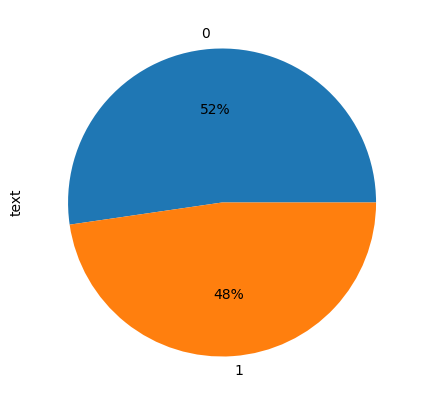

In [19]:
#How many fake and real news are in the dataset?

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="pie",figsize=(5,5),autopct='%1.0f%%')
plt.show()

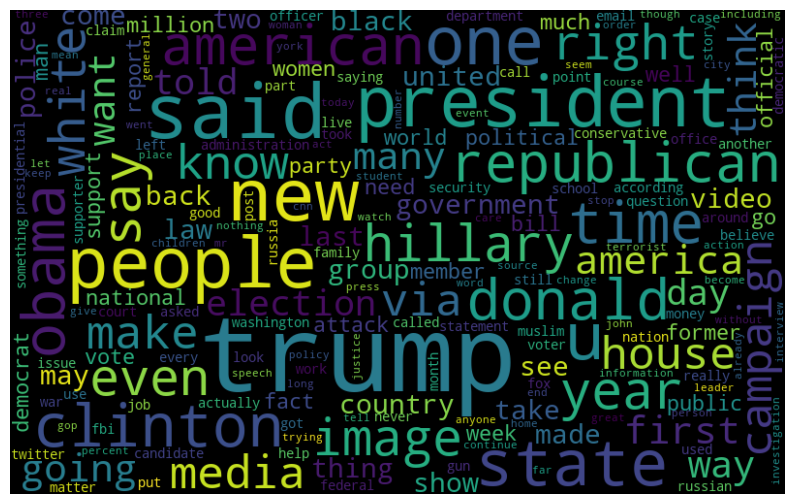

In [20]:
# WordCloud for Fake News

from wordcloud import WordCloud #imports wordcloud class from wordcloud library

fake_data = data[data["target"] == "0"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                            max_font_size = 110,
                            collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

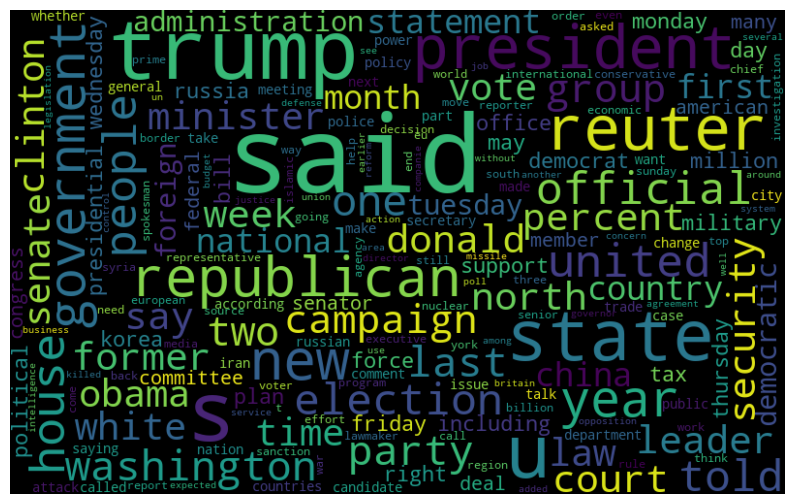

In [21]:
from wordcloud import wordcloud
real_data = data[data["target"] == "1"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                            max_font_size = 110,
                            collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

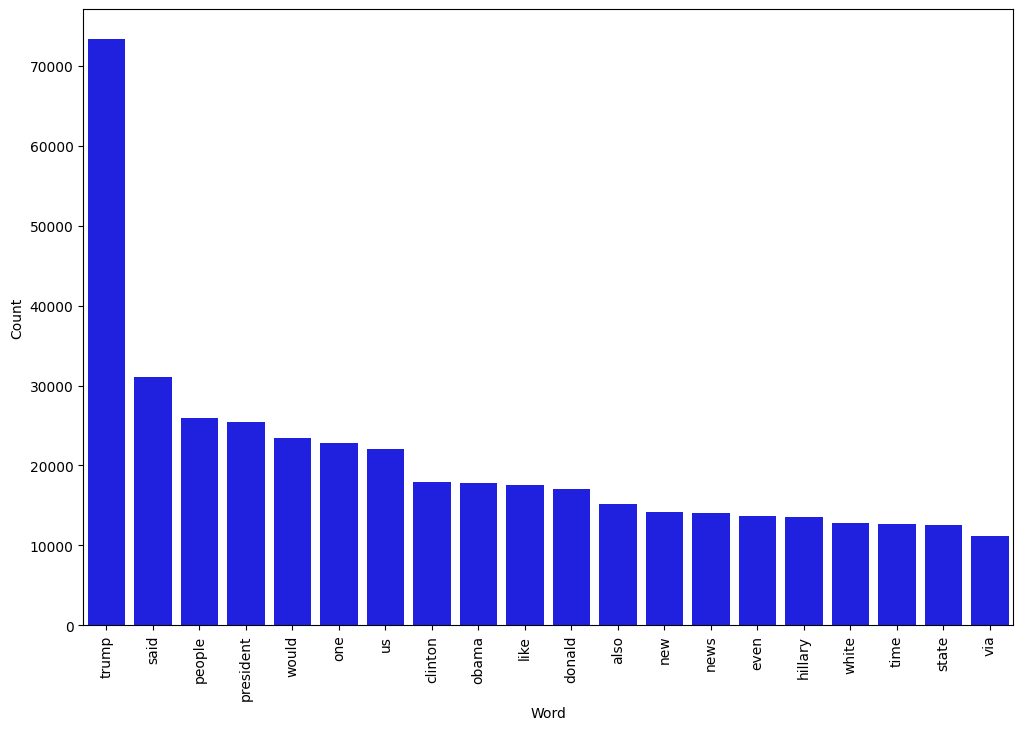

In [24]:
counter(data[data["target"] == "0"], "text", 20)

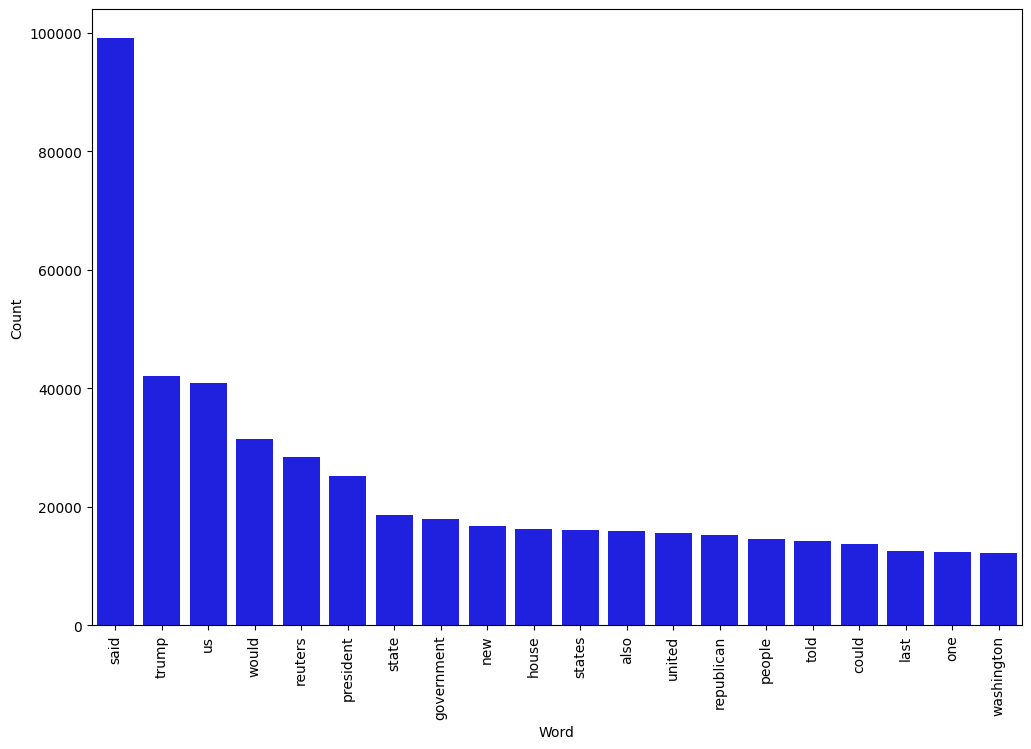

In [25]:
counter (data[data["target"] == "1"], "text", 20)

## MODELING

In [26]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [34]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
dct = {}
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.01%


Confusion matrix, without normalization


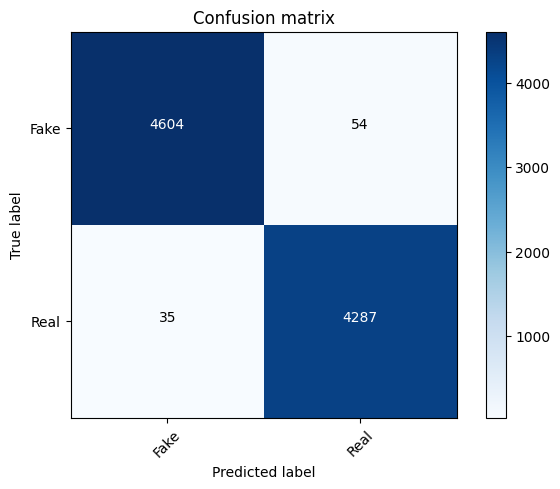

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])